In [1]:
import pyvisa as visa
import time
import numpy as np
import datetime
import os

from UtilsPPMS import *
from UtilsBasic import *
from UtilsKeithley6221 import *
from UtilsSR865A import *

rm = visa.ResourceManager()
rm.list_resources()

('ASRL3::INSTR',
 'GPIB0::10::INSTR',
 'GPIB0::14::INSTR',
 'GPIB0::15::INSTR',
 'GPIB0::17::INSTR')

In [2]:
angles = createArraywithSteps([0,360],[10])

The final array generated is  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360]


In [3]:
lockin_id=10
ac_6221_id=14

ppms = Dynacool('192.168.0.7')
ac=K6221(GPIBnum=ac_6221_id)
lock=Lockin(GPIBnum=lockin_id)

In [4]:
import pyvisa as visa
import time
import numpy as np
import pymeasure
from pymeasure.instruments.keithley import Keithley2400
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#from field_control import vsm_set_field, set_field, read_field
from UtilsKeithley6221 import *
import pylab as pl
from IPython import display

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

In [5]:
from UtilsPPMS import *
ppms = Dynacool('192.168.0.7')
ppms.setField(500)
ppms.waitForField()

0

In [50]:
ppms.setPosition(0)
#ppms.waitForPosition()

0

In [7]:
import datetime
print(datetime.datetime.now())

2023-03-23 10:01:44.417401


In [8]:
rm = pyvisa.ResourceManager()
rm.list_resources()

('ASRL3::INSTR',
 'GPIB0::10::INSTR',
 'GPIB0::14::INSTR',
 'GPIB0::15::INSTR',
 'GPIB0::17::INSTR')

In [9]:
from UtilsKeithley6221 import *
#from UtilsKeithley6221 import 
#Test Keithley 6221 connection. If it cannot connect, check the GPIB port (specify with K6221(GPIBnum=#))
ac=K6221(GPIBnum=14)

In [34]:
ac.ac.write("SOUR:WAVE:ABOR")

16

In [11]:
from UtilsSR865A import *
lock=Lockin()
lock.readLockin()


(-1.4996454079e-09, 2.2513282349e-09, 2.6953053123e-09, 125.5626297)

In [12]:
from UtilsSR865A import *
#lock.measureLockin(count=10, time_step=0.1,
                        #wait_before_measure=10,
                        #harm=1, sens=0.0001)

In [13]:
def angular_magnon_measurement(sample_id=''):
    name = "data/"+sample_id
    file_name = name+".csv"
    
    with open(file_name, 'a') as f:
        f.write("angle,x\n")
    
    for i in angles:
        ppms.setPosition(i)
        ppms.waitForPosition()
        ppms.getPosition()
        #x,y,theta,r,std_x,std_y,std_theta,std_r = lock.measureLockin(10,0.1,10,1,0.00001)
        r =  float(lock.lock_in.query("OUTP? 2").strip())
        
        time.sleep(10)
        with open(file_name, 'a') as f:
            f.write('{},{}\n'.format(i,r))
        
        
        plotAngular(file_name)

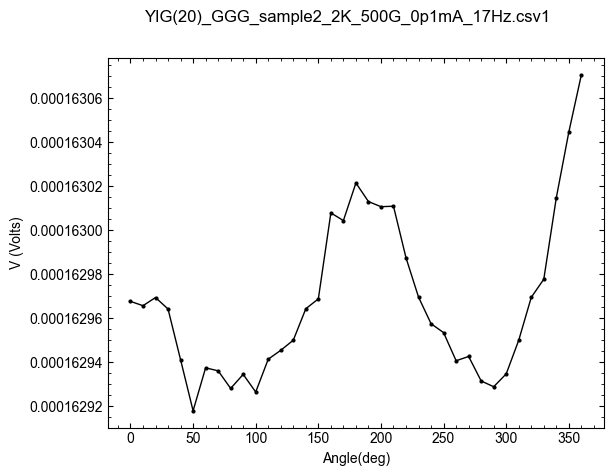

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

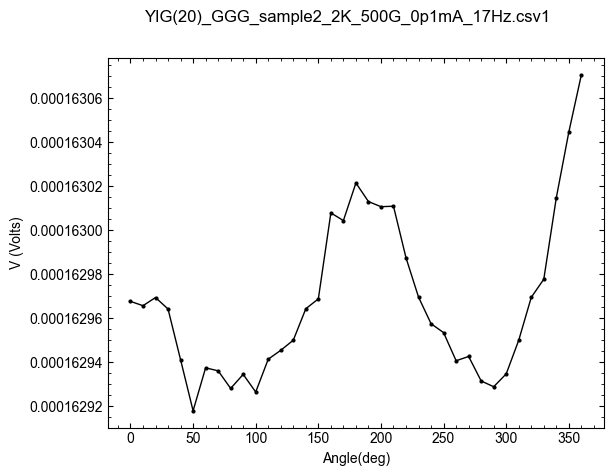

In [49]:
angular_magnon_measurement(sample_id="YIG(20)_GGG_sample2_2K_500G_0p1mA_17Hz")

In [38]:
ppms.getPosition()

-0.00030517578125

In [15]:
ppms.setField(500)
ppms.waitForField()

0

In [51]:
ppms.setTemperature(300, rate=20)
ppms.waitForTemperature()

0

In [48]:
ac.sinOut(amp=0.1e-3, duration='INF' ,freq=17, offs=0, wait_after_arm=2)


In [18]:
def plotAngular(file_name):
    display.clear_output(wait=True)
    #Plot current data
    hlength = 0
    with open(file_name) as myFile:
        for num, line in enumerate(myFile, 1):
            if 'Temp' in line:
                hlength = num-1

    df = pd.read_csv(file_name, header=hlength)
    #print(df)
    
    plt.clf()
    fig,ax=plt.subplots()
    plt.suptitle(file_name.split('/')[-1]+'1')
    

    ax.plot(df.angle,df.x, color='k', linestyle='-',marker='o', markersize='2',linewidth=1)
    ax.ticklabel_format(useOffset=False)
    ax.set_xlabel('Angle(deg)')
    ax.set_ylabel('V (Volts)')

    plt.tick_params(direction='in', which='both', right=True, top=True)
    #plt.tick_params(which='major', length=6)
    #plt.tick_params(which='minor', length=3)
    plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
    #plt.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.rcParams['font.family'] = "Arial"    
    
    fig.savefig(file_name[:-4]+'.png', dpi=600)
    display.display(plt.gcf())